<a href="https://colab.research.google.com/github/najibur-rahman/Machine-Learning/blob/main/KMeans_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


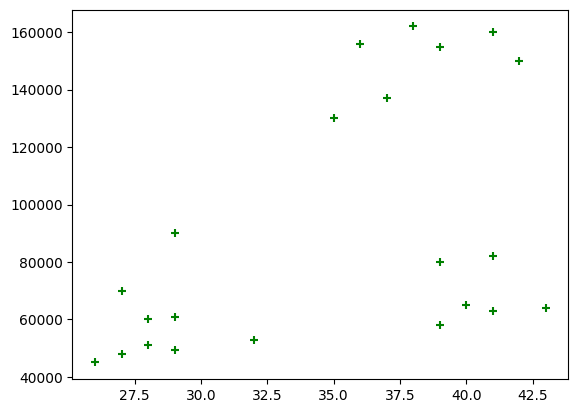

In [ ]:
plt.scatter(df.Age, df['Income($)'], color = 'green', marker = '+')

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

In [ ]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [ ]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [ ]:
df['Assign_Cluster'] = y_pred
df.head()

,Name,Age,Income($),Assign_Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [ ]:
df0 = df[df.Assign_Cluster == 0]
df1 = df[df.Assign_Cluster == 1]
df2 = df[df.Assign_Cluster == 2]

/tmp/ipython-input-775287799.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


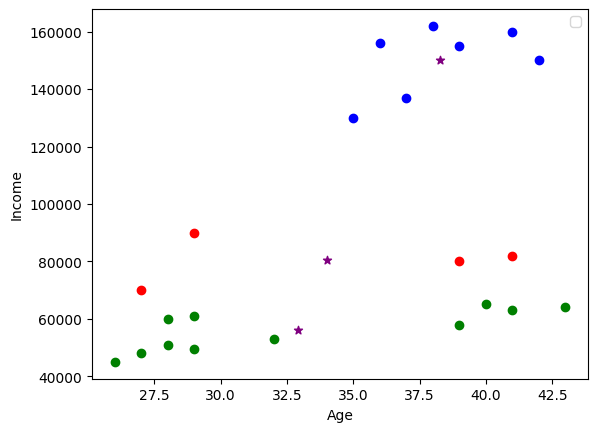

In [ ]:
plt.xlabel('Age')
plt.ylabel("Income")
plt.scatter(df0.Age, df0['Income($)'], color = 'Green')
plt.scatter(df1.Age, df1['Income($)'], color = 'blue')
plt.scatter(df2.Age, df2['Income($)'], color = 'red')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'purple', marker = "*")
plt.legend()

In [ ]:
#library
# object
#
# transform
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])

In [ ]:
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

In [ ]:
df.head()

,Name,Age,Income($),Assign_Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [ ]:
km = KMeans(n_clusters=3)

In [ ]:
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [ ]:
df['Assign_Cluster'] = y_pred
df.head()

,Name,Age,Income($),Assign_Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [ ]:
df0 = df[df.Assign_Cluster == 0]
df1 = df[df.Assign_Cluster == 1]
df2 = df[df.Assign_Cluster == 2]

/tmp/ipython-input-775287799.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


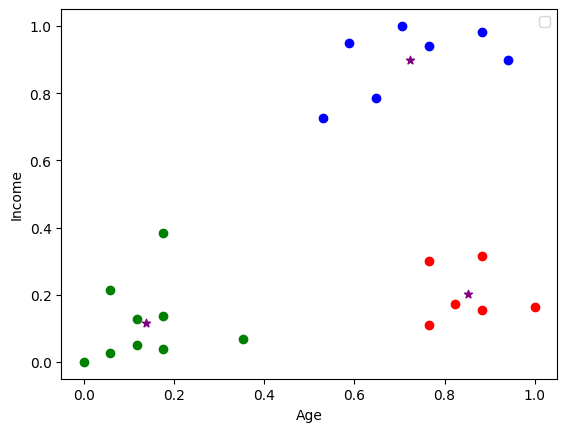

In [ ]:
plt.xlabel('Age')
plt.ylabel("Income")
plt.scatter(df0.Age, df0['Income($)'], color = 'Green')
plt.scatter(df1.Age, df1['Income($)'], color = 'blue')
plt.scatter(df2.Age, df2['Income($)'], color = 'red')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'purple', marker = "*")
plt.legend()

In [ ]:
WCSS = []
k_rng = range(1, 10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    WCSS.append(km.inertia_)


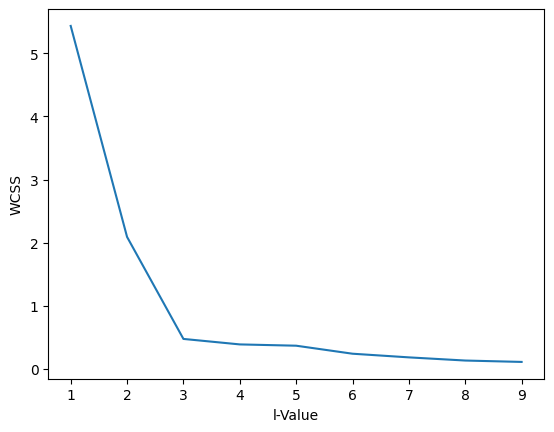

In [ ]:
plt.xlabel('l-Value')
plt.ylabel('WCSS')
plt.plot(k_rng, WCSS)